In [177]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.datasets import make_blobs
import random
import json
import time
from tabulate import tabulate
from math import *
from kdtreen import *
from helper import *

In [178]:
factorial(5)

120

In [179]:
savefile = "mst_data3.json"
to_plot = True
no_points = 50
no_centres = 1

In [180]:
if no_points > 999:
    to_plot = False

In [181]:
# from sklearn.datasets import make_blobs , make_circles

# X, Y = make_blobs(n_samples=no_points, centers=no_centres)
# # # points = list(set([(round(x, 1), round(y, 1)) for x, y in X]))
# points = list(set([(x , y) for x, y in X]))



In [182]:
# from sklearn.datasets import  make_circles

# X, y = make_circles(n_samples=no_points, factor=0.5, noise=0.05)
# points = [(x, y) for x, y in X]

In [183]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

iris = load_iris()
X_original = iris.data
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_original)

X_synthetic, y_synthetic = gmm.sample(n_samples=10000)

points = [(x[0], x[1]) for x in X_synthetic[:, :2]]
points = list(set(points))


no_points = len(points)

In [184]:
print("Number of points: ", no_points)

Number of points:  117


In [185]:
cordmap = {point: i for i, point in enumerate(points)}

In [186]:
dcran_start_time = time.time()
i_neighbors_dict = {}
tree = KDTree()
G = nx.Graph()
cached_count = 0

In [187]:
def build( points):
    global cordmap, i_neighbors_dict, tree, G 
    limit_dist = (  ceil(log2(len(points))))
    tree.root = tree.build(points)
    
    for coord, index in cordmap.items():
        G.add_node(index, pos=coord)
    for point in points:
        i_neighbors_dict[point] = i_neighbors(tree, point, limit_dist)
        
    return  tree, G 


In [188]:
def add_edges(G, i,pointi, points):
    for dis , pointj in points:
        if pointi == pointj:
            continue
        G.add_edge(i, cordmap[pointj], weight = dis)
    return 

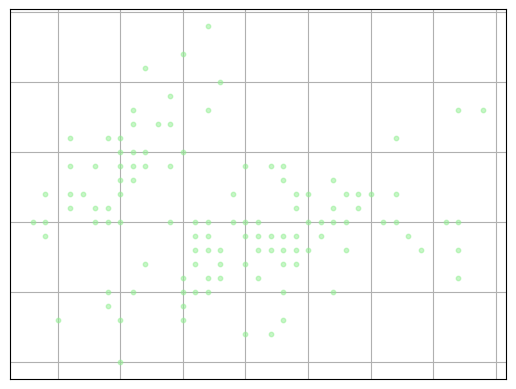

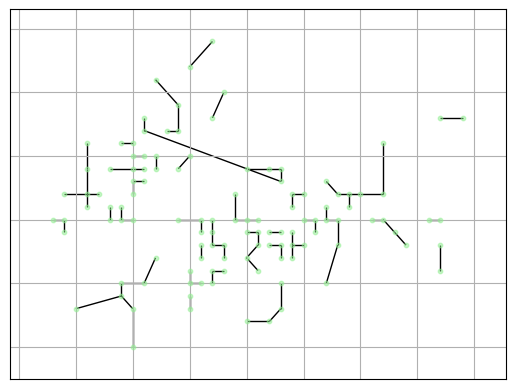

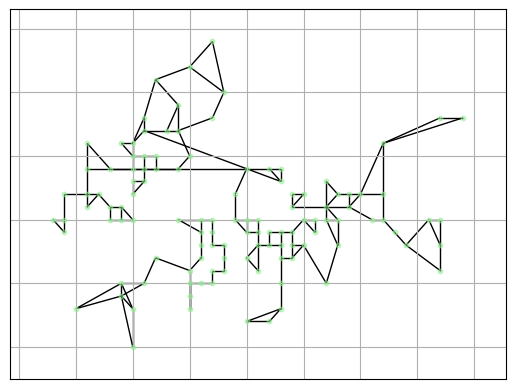

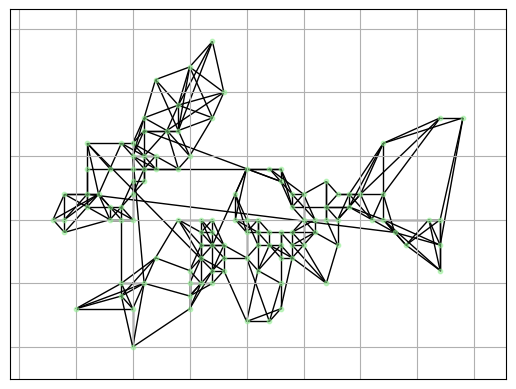

Graph with 117 nodes and 329 edges
1 clusters 3 k


In [189]:
def dcran(points):
    global G, cached_count, tree
    tree, G = build(points)
    k = 0
    visited = set()
    graphify(G, to_plot)
    
    while k * k <= log2(len(points)):
        k += 1
        for pointi, i in cordmap.items():
            points_to_con = []
            dis1 = k - 1
            dis2 = min(factorial(k), int(log2(len(points)))) - 1
            for dis_hand in (dis1, dis2):
                if dis_hand in visited:
                    continue
                pointj = i_neighbors_dict[pointi][dis_hand]
                points_to_con.append(pointj)

            if random.randint(0, 2**64) % len(points) < factorial(k):
                pointl_cord = points[random.randint(0, len(points) - 1)]
                eudis = euclidean_distance(pointi, pointl_cord)
                points_to_con += [(eudis, pointl_cord)]
            add_edges(G, i, pointi, points_to_con)

        graphify(G, to_plot)
        if count_clusters(G) == 1:
            break

        visited.add(dis1)
        visited.add(dis2)

    print(G)
    print(count_clusters(G), "clusters", k, "k")


dcran(points)

In [190]:
# print(not i_neighbors_dict[(4.731639612763604, -0.0143992306601608)])

In [191]:
num_nodes = G.number_of_nodes()
conedge = num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")

Total number of nodes: 117
Total number of edges: 329
Total sum of edge weights: 83.95766725129371


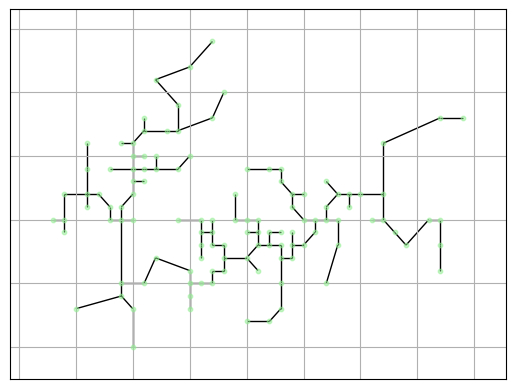

In [192]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")
graphify(mst, to_plot)

In [193]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()


foundw = total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")
dcran_end_time = time.time()
dcran_elapsed_time = dcran_end_time - dcran_start_time
print(f"Elapsed time: {dcran_elapsed_time:.2f} seconds")

Total number of nodes: 117
Total number of edges: 116
Total sum of edge weights: 17.73280018382602
Elapsed time: 0.64 seconds


In [194]:
stmst_start_time = time.time()
G = nx.Graph()

for pointi, i in cordmap.items():
    G.add_node(i, pos=pointi)
    for pointj, j in cordmap.items():
        if i != j:
            dis = euclidean_distance(pointi, pointj)
            G.add_edge(i, j, weight=dis)

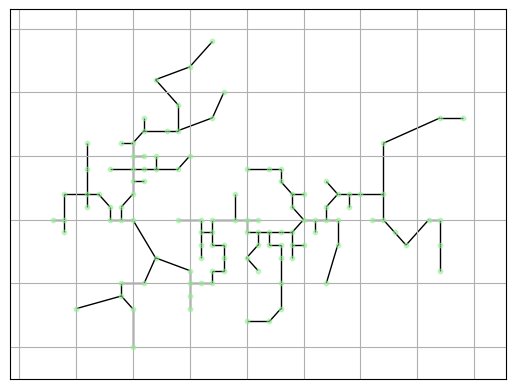

In [195]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")
graphify(mst, to_plot)

In [196]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
realw = total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")
stmst_end_time = time.time()
stmst_elapsed_time = stmst_end_time - stmst_start_time

Total number of nodes: 117
Total number of edges: 116
Total sum of edge weights: 17.593355311372413


In [197]:
print(stmst_elapsed_time)

0.17460894584655762


In [198]:
percentage_error = ((foundw - realw) / realw) * 100
speedup = round((stmst_elapsed_time / dcran_elapsed_time), 2)

# Format the output for readability
formatted_output = f"Real Weight: {realw}  Found Weight: {foundw}  no of Edge: {conedge} Percentage Error: {percentage_error:.2f}%"
print(formatted_output ,"speedup" ,  speedup)

Real Weight: 17.593355311372413  Found Weight: 17.73280018382602  no of Edge: 329 Percentage Error: 0.79% speedup 0.27


In [199]:
! notify-send "DCRAN" "Done"

In [200]:

with open(savefile, "r") as f:
    loaded_data = json.load(f)
print(loaded_data)
currres = []
speedup = round((stmst_elapsed_time / dcran_elapsed_time), 2)
loaded_data.append(
    [
        no_points,
        no_centres,
        foundw,
        realw,
        conedge,
        percentage_error,
        dcran_elapsed_time,
        stmst_elapsed_time,
        speedup,
    ]
)

# Save the updated dictionary back to the JSON file
with open(savefile, "w") as f:
    json.dump(loaded_data, f)

[[100, 3, 69.5834605708583, 61.12651682979382, 217, 13.835147460819272, 0.3657097816467285, 0.15007662773132324, 0.41], [1000, 3, 178.1296547074689, 169.79749951393245, 2073, 4.907113012493306, 0.13645148277282715, 2.6751606464385986, 19.61], [10000, 3, 560.4336576184252, 551.2093922986705, 34115, 1.6734593874185122, 1.4019782543182373, 461.52739453315735, 329.2], [5000, 3, 405.3639353572892, 388.5071736203694, 10298, 4.338854693424907, 0.656238317489624, 84.39165115356445, 128.6], [10000, 3, 563.1719582190365, 551.2093922986705, 26928, 2.1702398557613956, 1.42179536819458, 501.7644808292389, 352.91], [100, 3, 69.4494042709885, 61.12651682979382, 283, 13.615837893020585, 0.04594159126281738, 0.029672622680664062, 0.65], [100, 3, 0, 61.12651682979382, 0, -100.0, 0.07219552993774414, 0.08635163307189941, 1.2], [100, 3, 0, 61.12651682979382, 0, -100.0, 0.05329132080078125, 0.04036855697631836, 0.76], [100, 3, 0, 61.12651682979382, 0, -100.0, 0.05528092384338379, 0.032852888107299805, 0.59

In [201]:
with open(savefile, "r") as f:
    loaded_data = json.load(f)
print(loaded_data)

[[100, 3, 69.5834605708583, 61.12651682979382, 217, 13.835147460819272, 0.3657097816467285, 0.15007662773132324, 0.41], [1000, 3, 178.1296547074689, 169.79749951393245, 2073, 4.907113012493306, 0.13645148277282715, 2.6751606464385986, 19.61], [10000, 3, 560.4336576184252, 551.2093922986705, 34115, 1.6734593874185122, 1.4019782543182373, 461.52739453315735, 329.2], [5000, 3, 405.3639353572892, 388.5071736203694, 10298, 4.338854693424907, 0.656238317489624, 84.39165115356445, 128.6], [10000, 3, 563.1719582190365, 551.2093922986705, 26928, 2.1702398557613956, 1.42179536819458, 501.7644808292389, 352.91], [100, 3, 69.4494042709885, 61.12651682979382, 283, 13.615837893020585, 0.04594159126281738, 0.029672622680664062, 0.65], [100, 3, 0, 61.12651682979382, 0, -100.0, 0.07219552993774414, 0.08635163307189941, 1.2], [100, 3, 0, 61.12651682979382, 0, -100.0, 0.05329132080078125, 0.04036855697631836, 0.76], [100, 3, 0, 61.12651682979382, 0, -100.0, 0.05528092384338379, 0.032852888107299805, 0.59

In [202]:
headers = [
    "Points",
    "Centres",
    "DCRAN Wt",
    "kruskal Wt",
    "Edge count",
    "Acc(%)",
    "DCRAN Time (s)",
    "STMST Time (s)",
    "Speedup",
]

# Format the data as a table using tabulate
table_str = tabulate(
    loaded_data,
    headers,
    tablefmt="pipe",
    floatfmt=(".0f", ".0f", ".1f", ".1f", ".0f", ".2f", ".2f", ".2f", ".2f"),
)
print(table_str)

|   Points |   Centres |   DCRAN Wt |   kruskal Wt |   Edge count |   Acc(%) |   DCRAN Time (s) |   STMST Time (s) |   Speedup |
|---------:|----------:|-----------:|-------------:|-------------:|---------:|-----------------:|-----------------:|----------:|
|      100 |         3 |       69.6 |         61.1 |          217 |    13.84 |             0.37 |             0.15 |      0.41 |
|     1000 |         3 |      178.1 |        169.8 |         2073 |     4.91 |             0.14 |             2.68 |     19.61 |
|    10000 |         3 |      560.4 |        551.2 |        34115 |     1.67 |             1.40 |           461.53 |    329.20 |
|     5000 |         3 |      405.4 |        388.5 |        10298 |     4.34 |             0.66 |            84.39 |    128.60 |
|    10000 |         3 |      563.2 |        551.2 |        26928 |     2.17 |             1.42 |           501.76 |    352.91 |
|      100 |         3 |       69.4 |         61.1 |          283 |    13.62 |             0.05 |